In [1]:
import pandas as pd

In [2]:
emotion = pd.read_csv("../../Data/Bayes_emotion_df.csv")

In [3]:
emotion.head()

,문장,감정
0,끝없이 별빛이 내리던 밤 기분 좋은 바람이 두 빰을 스치고 새벽 바다 한곳을 보는 ...,positive
1,날 향해 웃어주는 입술 끝 모양과 저 달보다 사랑스러운 두 눈을 가진 네가 다정히 ...,positive
2,내게 보였던 그 미소 다 너무 예뻐서 더 보고 싶어서 나를 달래고 있죠,positive
3,끝없이 별빛이 내리던 밤 기분 좋은 바람이 두 빰을 스치고 새벽 바다 한곳을 보는 ...,positive
4,너를 기다리다가 문득 행복한 상상이 현실이 되길 기도하니까 내 눈엔 너만 빛나고 있어,positive


In [4]:
import re
import numpy as np
from konlpy.tag import Okt
from sklearn import preprocessing
import tensorflow

In [5]:
okt = Okt()

In [6]:
lyric = emotion.문장[10]
lyric

'비바람이 없어도 봄은 오고 여름은 가고 오 그대여 눈물이 없어도 꽃은 피고 낙엽은 지네 오 내 남은 그리움 세월에 띄우고 잠이 드네 꿈을 꾸네 잠이 드네 꿈을 꾸네'

In [7]:
lyric_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ+]","",lyric,count=1)
lyric_text

'비바람이없어도 봄은 오고 여름은 가고 오 그대여 눈물이 없어도 꽃은 피고 낙엽은 지네 오 내 남은 그리움 세월에 띄우고 잠이 드네 꿈을 꾸네 잠이 드네 꿈을 꾸네'

In [8]:
lyric_text = okt.morphs(lyric_text)
print(lyric_text)

['비바람', '이', '없어도', '봄', '은', '오고', '여름', '은', '가고', '오', '그대', '여', '눈물', '이', '없어도', '꽃', '은', '피고', '낙엽', '은', '지네', '오', '내', '남은', '그리움', '세월', '에', '띄우고', '잠', '이', '드', '네', '꿈', '을', '꾸네', '잠', '이', '드', '네', '꿈', '을', '꾸네']


In [9]:
stop_words=set(['이','을','한','곳','을','보는','와','날향해','과','저','내','가','보다','눈','가진',\
                '보였던','그','다','더','나를','있죠','되길','하니까','엔','만','있어','게','으로',\
                '의','볼래요','가는','일이','야','같은','발짝','로','다해','세','할게','할','거야',\
                '여','없어','지네','드','은','오'])
clean_lyric=[token for token in lyric_text if not token in stop_words]

print(clean_lyric)

['비바람', '없어도', '봄', '오고', '여름', '가고', '그대', '눈물', '없어도', '꽃', '피고', '낙엽', '남은', '그리움', '세월', '에', '띄우고', '잠', '네', '꿈', '꾸네', '잠', '네', '꿈', '꾸네']


In [10]:
def preprocessing(lyric,okt,remove_stopwords = False,stop_words=[]):
    lyrics_text = re.sub("[^가-힇ㄱ-ㅎㅏ-ㅣ+]","",lyric)
    lyrics_text1 = okt.morphs(lyrics_text,stem=True)
    if remove_stopwords:
        stop_words=set(['이','을','한','곳','을','보는','와','날향해','과','저','내','가','보다','눈','가진',\
                        '보였던','그','다','더','나를','있죠','되길','하니까','엔','만','있어','게','으로',\
                        '의','볼래요','가는','일이','야','같은','발짝','로','다해','세','할게','할','거야',\
                        '여','없어','지네','드','은','오'])
        clean_lyrics=[token for token in lyric_text if not token in stop_words]
    return clean_lyrics

In [11]:
test = []
for lyric in emotion.문장:
    if type(lyric) == str:
        test.append(preprocessing(lyric,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        test.append([])

In [12]:
test

[['비바람',
  '없어도',
  '봄',
  '오고',
  '여름',
  '가고',
  '그대',
  '눈물',
  '없어도',
  '꽃',
  '피고',
  '낙엽',
  '남은',
  '그리움',
  '세월',
  '에',
  '띄우고',
  '잠',
  '네',
  '꿈',
  '꾸네',
  '잠',
  '네',
  '꿈',
  '꾸네'],
 ['비바람',
  '없어도',
  '봄',
  '오고',
  '여름',
  '가고',
  '그대',
  '눈물',
  '없어도',
  '꽃',
  '피고',
  '낙엽',
  '남은',
  '그리움',
  '세월',
  '에',
  '띄우고',
  '잠',
  '네',
  '꿈',
  '꾸네',
  '잠',
  '네',
  '꿈',
  '꾸네'],
 ['비바람',
  '없어도',
  '봄',
  '오고',
  '여름',
  '가고',
  '그대',
  '눈물',
  '없어도',
  '꽃',
  '피고',
  '낙엽',
  '남은',
  '그리움',
  '세월',
  '에',
  '띄우고',
  '잠',
  '네',
  '꿈',
  '꾸네',
  '잠',
  '네',
  '꿈',
  '꾸네'],
 ['비바람',
  '없어도',
  '봄',
  '오고',
  '여름',
  '가고',
  '그대',
  '눈물',
  '없어도',
  '꽃',
  '피고',
  '낙엽',
  '남은',
  '그리움',
  '세월',
  '에',
  '띄우고',
  '잠',
  '네',
  '꿈',
  '꾸네',
  '잠',
  '네',
  '꿈',
  '꾸네'],
 ['비바람',
  '없어도',
  '봄',
  '오고',
  '여름',
  '가고',
  '그대',
  '눈물',
  '없어도',
  '꽃',
  '피고',
  '낙엽',
  '남은',
  '그리움',
  '세월',
  '에',
  '띄우고',
  '잠',
  '네',
  '꿈',
  '꾸네',
  '잠',
  '네',
  '꿈',
  '꾸네'],
 ['비바람',
  '없어도

In [13]:
import nltk

In [14]:
for i in test:
    ko = nltk.Text(i)
ko.vocab().most_common(100)

[('없어도', 2),
 ('잠', 2),
 ('네', 2),
 ('꿈', 2),
 ('꾸네', 2),
 ('비바람', 1),
 ('봄', 1),
 ('오고', 1),
 ('여름', 1),
 ('가고', 1),
 ('그대', 1),
 ('눈물', 1),
 ('꽃', 1),
 ('피고', 1),
 ('낙엽', 1),
 ('남은', 1),
 ('그리움', 1),
 ('세월', 1),
 ('에', 1),
 ('띄우고', 1)]

In [15]:
token_sum = list(ko.vocab())

In [16]:
from tensorflow import keras

In [17]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result = []
lines = emotion.문장
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if not word[1] in ["Josa","Eomi","Puntuation"]:
            if word[0] != "n":
                r.append(word[0])
    rl = (" ".join(r).strip())
    
    okt_result.append(rl)

In [18]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [19]:
print((encoded[1]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 10, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
import matplotlib.pyplot as plt

가사의 최대 길이 : 167
가사의 최소 길이 : 31
가사의 평균 길이 : 58.700000


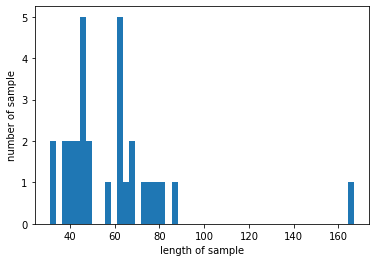

In [21]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [81]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=55, padding='pre')
padding_paragraphs_encoding

array([[ 0,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [82]:
print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

30 55


In [83]:
# 분류항목(food,sports)를 수치로 변경하기
categories = emotion['감정'].to_list()

In [84]:
def category_encode(category):
    if category == 'positive':
        return [1,0,0]
    elif category == 'negative':
        return [0,1,0]
    else:
        return [0,0,1]

In [85]:
encoded_category = [category_encode(category) for category in categories]
encoded_category

[[1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0]]

In [86]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [87]:
# train val data 만들기
trainData, valData, trainTarget, valTarget = train_test_split(
    train_input, train_target, test_size=0.2
)

In [88]:
results = set()
emotion.문장.str.split().apply(results.update)
vocab_size = len(results)
vocab_size

411

In [180]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.Embedding(vocab_size,5,input_length=max_length,input_shape=(55,))) 
# one hot encoding 만드는 애
# Embedding(중복 없는 전체 단어 갯수,index,가장 간 문장의 단어 갯수 )
# 임베딩 레이어는 인덱스를 받아 5차원 벡터의 임베딩을 출력합니다.
model.add(keras.layers.LSTM(128,dropout=0.4))

# 분류 단계
# 분류 단계
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(3,activation='softmax'))

In [181]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [182]:
import numpy as np

In [183]:
train_x = np.array(train_input)
train_y = np.array(train_target)

In [184]:
val_x = np.array(valData)
val_y = np.array(valTarget)

In [185]:
print(train_x.shape)
print(train_y.shape)

(24, 55)
(24, 3)


In [186]:
print(val_x.shape)
print(val_y.shape)

(5, 55)
(5, 3)


In [187]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 55, 5)             2055      
                                                                 
 lstm_13 (LSTM)              (None, 128)               68608     
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 16)                528       
                                                                 
 dense_45 (Dense)            (None, 3)                 51        
                                                                 
Total params: 81,578
Trainable params: 81,578
Non-tra

In [188]:
history = model.fit(
    train_x,
    train_y,
    epochs=600,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (val_x, val_y),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/600
1/1 [==============================] - 4s 4s/step - loss: 1.0986 - accuracy: 0.2917 - val_loss: 1.0985 - val_accuracy: 0.6000
Epoch 2/600
1/1 [==============================] - 0s 115ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0979 - val_accuracy: 0.6000
Epoch 3/600
1/1 [==============================] - 0s 110ms/step - loss: 1.0985 - accuracy: 0.3333 - val_loss: 1.0975 - val_accuracy: 0.6000
Epoch 4/600
1/1 [==============================] - 0s 97ms/step - loss: 1.0984 - accuracy: 0.3333 - val_loss: 1.0963 - val_accuracy: 0.6000
Epoch 5/600
1/1 [==============================] - 0s 103ms/step - loss: 1.0984 - accuracy: 0.3333 - val_loss: 1.0949 - val_accuracy: 0.6000
Epoch 6/600
1/1 [==============================] - 0s 114ms/step - loss: 1.0983 - accuracy: 0.3333 - val_loss: 1.0942 - val_accuracy: 0.6000
Epoch 7/600
1/1 [==============================] - 0s 109ms/step - loss: 1.0985 - accuracy: 0.3333 - val_loss: 1.0946 - val_accuracy: 0.6000
Epoch 8/600
1/1 [

In [189]:
print("accuracy :" , np.mean(history.history['accuracy']))
print("val_accuracy :" , np.mean(history.history['val_accuracy']))

accuracy : 0.772986111342907
val_accuracy : 0.7426666743805012


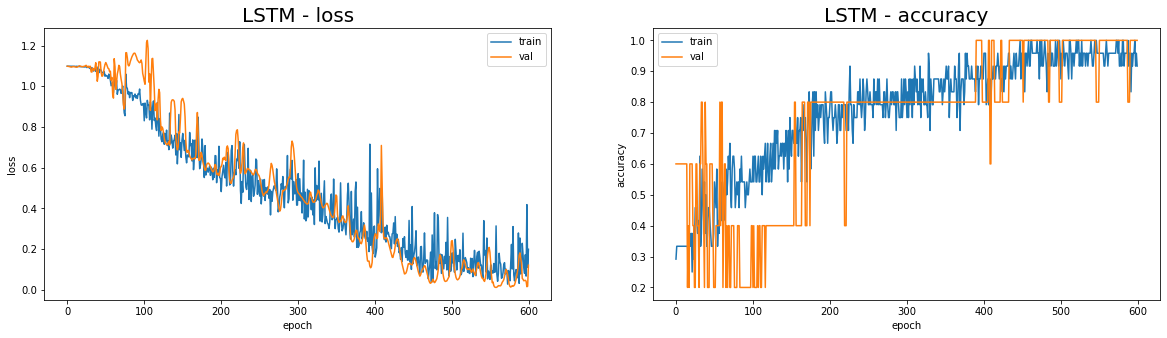

In [191]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("LSTM - loss", size=20)
ax2.set_title("LSTM - accuracy", size=20)
plt.show()

In [192]:
test_result = []
test_result.append(model.predict(test_input))

1/1 [==============================] - 1s 659ms/step


In [194]:
result = []
for i in range(0,6):    
    result.append(test_result[0][i])

In [195]:
test_result

[array([[2.04658017e-01, 1.59609064e-01, 6.35732949e-01],
        [2.97559686e-02, 4.94005566e-04, 9.69749987e-01],
        [7.24992231e-02, 1.92898786e-09, 9.27500725e-01],
        [4.54212688e-02, 1.10413675e-05, 9.54567671e-01],
        [4.44312245e-01, 5.34410954e-01, 2.12767888e-02],
        [2.50062137e-03, 9.97499406e-01, 3.21496962e-09]], dtype=float32)]

In [196]:
result

[array([0.20465802, 0.15960906, 0.63573295], dtype=float32),
 array([2.9755969e-02, 4.9400557e-04, 9.6974999e-01], dtype=float32),
 array([7.2499223e-02, 1.9289879e-09, 9.2750072e-01], dtype=float32),
 array([4.54212688e-02, 1.10413675e-05, 9.54567671e-01], dtype=float32),
 array([0.44431224, 0.53441095, 0.02127679], dtype=float32),
 array([2.5006214e-03, 9.9749941e-01, 3.2149696e-09], dtype=float32)]

In [212]:
model.save('lstm_bayes_emotion.h5')

In [215]:
import random

In [218]:
len(test)

30

In [248]:
# def sentence_generation(model, length):
#     # 문자에 대한 랜덤한 정수 생성
#     ix = [np.random.randint(55)]

#     # 랜덤한 정수로부터 맵핑되는 문자 생성
#     y_char = [train_input[ix[-1]]]
#     print(ix[-1],'번 문자',y_char[-1],'로 예측을 시작!')

#     # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성
#     X = np.zeros((1, length, 55))

#     for i in range(length):
#         # X[0][i][예측한 문자의 인덱스] = 1, 즉, 예측 문자를 다음 입력 시퀀스에 추가
#         X[0][i][ix[-1]] = 1
#         print(train_input[ix[-1]], end="")
#         ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
#         y_char.append(train_input[ix[-1]])
#     return ('').join(y_char)

In [249]:
# result = sentence_generation(model, 2)
# print(result)

18 번 문자 [17  0  0 12  0  0  1  0  0 13  0 14  0  0 15  0  0  0  3  0  8  0  0  0
 16  0  0 17  0  0  0 18  0  0 20  0  0  0  2  0  0  0  4  0  5  0  0  2
  0  0  0  4  0  5  0] 로 예측을 시작!
[17  0  0 12  0  0  1  0  0 13  0 14  0  0 15  0  0  0  3  0  8  0  0  0
 16  0  0 17  0  0  0 18  0  0 20  0  0  0  2  0  0  0  4  0  5  0  0  2
  0  0  0  4  0  5  0]

ValueError: in user code:

    File "c:\Users\yejin\anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\yejin\anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\yejin\anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\yejin\anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "c:\Users\yejin\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\yejin\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 55), found shape=(None, 1, 55)


In [252]:
def sentence_generation(model, char_to_index, seq_length, seed_text, n):

    # 초기 시퀀스
    init_text = seed_text
    sentence = ''

    # 다음 문자 예측은 총 n번만 반복.
    for _ in range(n):
        encoded = [ko[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
        encoded = keras.utils.pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
        encoded = keras.utils.to_categorical(encoded, num_classes=len(char_to_index))

        # 입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y(예측한 문자)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for char, index in char_to_index.items():
            if index == result:
                break

        # 현재 시퀀스 + 예측 문자를 현재 시퀀스로 변경
        seed_text = seed_text + char

        # 예측 문자를 문장에 저장
        sentence = sentence + char

    # n번의 다음 문자 예측이 끝나면 최종 완성된 문장을 리턴.
    sentence = init_text + sentence
    return sentence

In [253]:
print(sentence_generation(model, ko, 10, '기적', 80))

TypeError: list indices must be integers or slices, not str